In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV (ya cargado previamente en tu entorno de VS Code)
df = pd.read_excel('PRU Comisiones 08-22 a 08-24.xlsx', sheet_name='Sheet')

In [ ]:
# Verificar las primeras filas del DataFrame
#print("Primeras filas del DataFrame:")
#print(df.head())

In [9]:
# Filtrar las filas válidas eliminando aquellas con valores nulos en columnas clave (por ejemplo, 'Aseg.' y 'Poliza')
df_filtered = df[df['Aseg.'].notna() & df['Poliza'].notna()]

In [10]:
# Convertir la columna 'FecVenc' de formato serial a fechas
df_filtered['FecVenc'] = pd.to_datetime(df_filtered['FecVenc'], origin='1899-12-30', unit='D')

# Extraer mes y año
df_filtered['Mes-Año'] = df_filtered['FecVenc'].dt.to_period('M')

C:\Users\Nico\AppData\Local\Temp\ipykernel_28120\3199204983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['FecVenc'] = pd.to_datetime(df_filtered['FecVenc'], origin='1899-12-30', unit='D')
C:\Users\Nico\AppData\Local\Temp\ipykernel_28120\3199204983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Mes-Año'] = df_filtered['FecVenc'].dt.to_period('M')


In [11]:
# Convertir las columnas numéricas a tipo float para cálculos
df_filtered['PremioTot'] = pd.to_numeric(df_filtered['PremioTot'], errors='coerce')
df_filtered['ComMO'] = pd.to_numeric(df_filtered['ComMO'], errors='coerce')

C:\Users\Nico\AppData\Local\Temp\ipykernel_28120\1725705833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PremioTot'] = pd.to_numeric(df_filtered['PremioTot'], errors='coerce')
C:\Users\Nico\AppData\Local\Temp\ipykernel_28120\1725705833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ComMO'] = pd.to_numeric(df_filtered['ComMO'], errors='coerce')


Evolución por premios totales agrupados por MES-AÑO:
    Mes-Año    PremioTot
26  2024-08  22928459.87
25  2024-07  21387295.91
24  2024-06  15208968.97
23  2024-05   9908422.07
21  2024-03   9424598.13
22  2024-04   8909029.32
20  2024-02   8560270.02
19  2024-01   7860928.72
18  2023-12   7475439.71
17  2023-11   6432857.92
16  2023-10   5538858.20
15  2023-09   5388476.43
14  2023-08   5304254.69
13  2023-07   5039279.23
12  2023-06   4331335.67
11  2023-05   3817084.34
10  2023-04   3286712.93
9   2023-03   2800885.05
8   2023-02   2616187.38
7   2023-01   1905874.49
6   2022-12   1539428.29
5   2022-11   1075476.37
27  2024-09    831830.44
4   2022-10    754909.89
3   2022-09    422074.22
2   2022-08    303285.60
1   2022-07     75729.98
0   2022-06       721.53


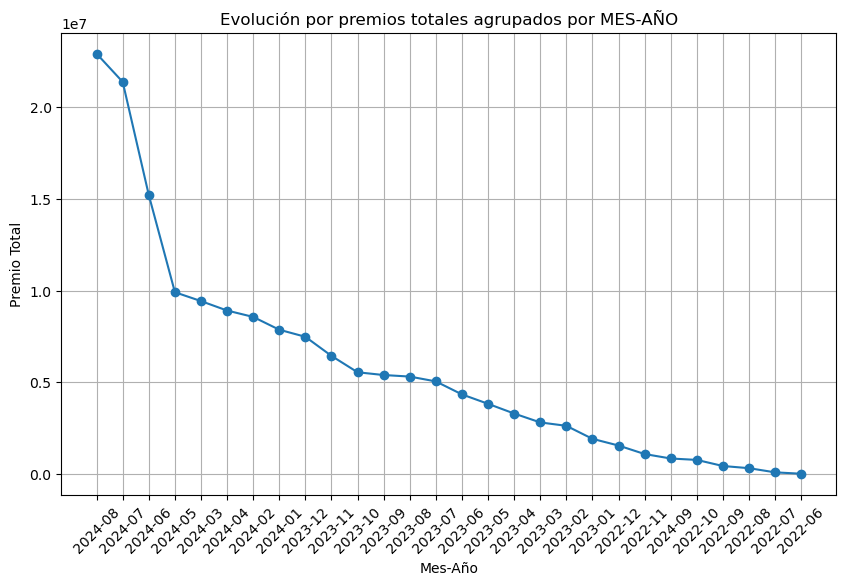

In [12]:
# 1. Evolución por premios totales agrupados por MES-AÑO
evolucion_premios = df_filtered.groupby('Mes-Año')['PremioTot'].sum().reset_index().sort_values(by='PremioTot', ascending=False)
print("Evolución por premios totales agrupados por MES-AÑO:")
print(evolucion_premios)

# 1. Gráfico de líneas para evolución de premios totales por MES-AÑO
plt.figure(figsize=(10, 6))
plt.plot(evolucion_premios['Mes-Año'].astype(str), evolucion_premios['PremioTot'], marker='o')
plt.xticks(rotation=45)
plt.title('Evolución por premios totales agrupados por MES-AÑO')
plt.xlabel('Mes-Año')
plt.ylabel('Premio Total')
plt.grid(True)
plt.show()


Cantidad por ramo ordenado por PremioTot:
               Ramo  PremioTot
0       Automoviles       8212
6   Vida Individual       1623
2       No Asignado         52
4    Riesgos Varios         41
5              Robo          5
1     Motovehículos          4
3  Responsab. Civil          3


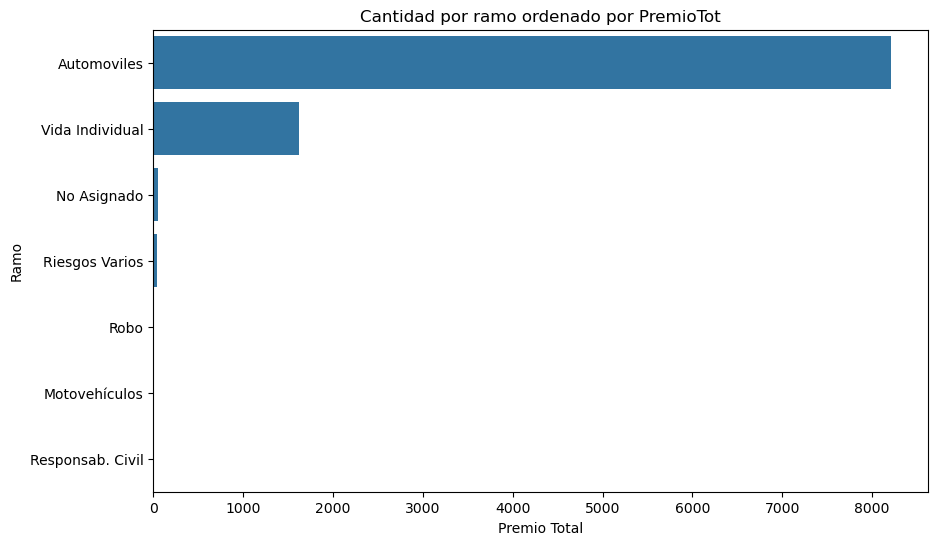

In [4]:
# 2. Cantidad por ramo ordenado por PremioTot
cantidad_por_ramo = df_filtered.groupby('Ramo')['PremioTot'].count().reset_index().sort_values(by='PremioTot', ascending=False)
print("\nCantidad por ramo ordenado por PremioTot:")
print(cantidad_por_ramo)

# 2. Gráfico de barras para cantidad por ramo ordenado por PremioTot
plt.figure(figsize=(10, 6))
sns.barplot(x='PremioTot', y='Ramo', data=cantidad_por_ramo, order=cantidad_por_ramo.sort_values('PremioTot', ascending=False)['Ramo'])
plt.title('Cantidad por ramo ordenado por PremioTot')
plt.xlabel('Premio Total')
plt.ylabel('Ramo')
plt.show()


Top 20 asegurados con más pólizas:
                             Aseg.  Poliza
259                   DIAZ BEATRIZ      56
0                                -      52
92          BARBIERI DAMIAN MATIAS      52
285                ESCALANTE ELENA      52
461        LAVINIA EMILIANO ANDRES      50
158  CACERES CARDOZO JORGE ANTONIO      50
62           ARECO MARIA CONSTANZA      48
665        PERELMAN BERNARDO JAIME      48
824         SILVA JOSEFINA PETRONA      46
120          BIDEGAIN LUIS ALBERTO      46
686              PRIETO OLGA NOEMI      46
54             ARAGON BRAIAN RAMON      44
399              GONZALEZ NORBERTO      44
476              LEZCANO SEBASTIAN      44
489        LUCERO LEONARDO JOAQUIN      44
283          EPREMIAN WALTER DARIO      44
59            ARCE NAHUEL EZEQUIEL      44
452            JUAREZ CARLOS OSCAR      44
902         VIERA SILVIO SEBASTIAN      44
408                     GRECO LUIS      42


C:\Users\Nico\AppData\Local\Temp\ipykernel_28120\1511000007.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Poliza', y='Aseg.', data=top_20_asegurados_polizas, palette='viridis')


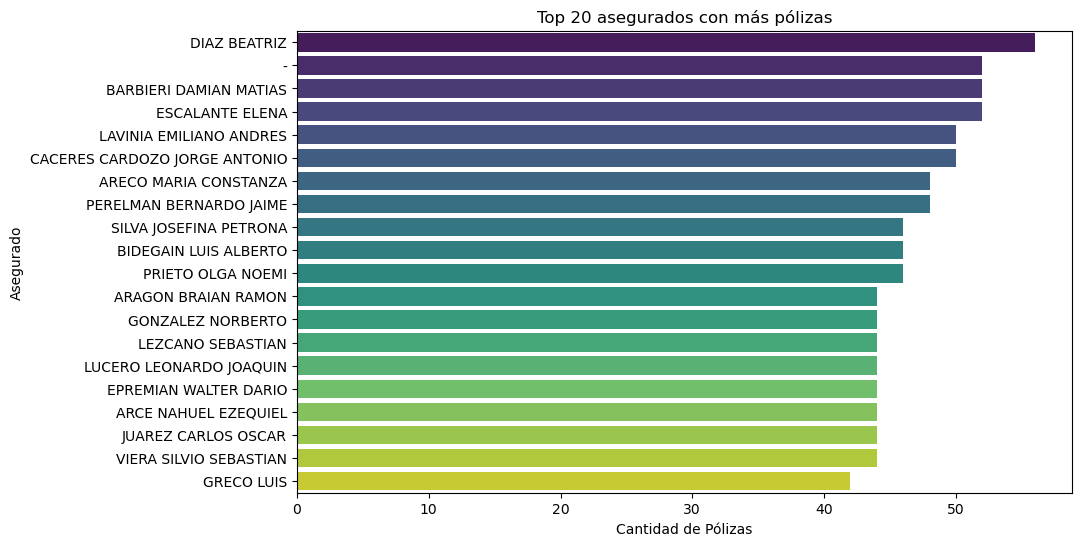

In [5]:
# 3. Top 20 asegurados con más pólizas
top_20_asegurados_polizas = df_filtered.groupby('Aseg.')['Poliza'].count().reset_index().sort_values(by='Poliza', ascending=False).head(20)
print("\nTop 20 asegurados con más pólizas:")
print(top_20_asegurados_polizas)

# 3. Gráfico de barras horizontales para top 20 asegurados con más pólizas
plt.figure(figsize=(10, 6))
sns.barplot(x='Poliza', y='Aseg.', data=top_20_asegurados_polizas, palette='viridis')
plt.title('Top 20 asegurados con más pólizas')
plt.xlabel('Cantidad de Pólizas')
plt.ylabel('Asegurado')
plt.show()


Top 20 asegurados que pagan el premio más alto (por fila):
                                 Aseg.  PremioTot
860              AREVALO OSCAR RODOLFO  279405.90
3197            FABERO FABRICIO LEONEL  202956.64
7689         RICOLDS GABRIEL SEBASTIAN  165334.56
4234           GONZALEZ SILVIO RICARDO  145892.76
4495     HERRERA ANTUNEZ FREDY ALBERTO  132999.15
6167                 MIÑO JUAN ANTONIO  129586.62
7100  PEREIRA ROJAS HERMENEGILDO RAMON  125833.56
1675                BRAVO LUCAS ADRIAN  124208.97
8749            SILVA JOSEFINA PETRONA  117036.09
1352        BENITEZ FLORENCIA AGOSTINA  113524.36
7429              Proz silvia elisabet  111704.16
8303            SALDA?A MARIA FERNANDA  108502.04
6348         MONZON LUIS ANGEL GABRIEL  106183.38
2671           DEL VALLE VICTOR FABIAN  105511.00
4745               JACQUET CARLOS HUGO  103096.77
2606             DE ANDREA JORGE OSCAR  102361.92
7719               RIOS EVER FIGUEREDO  102170.82
4028                GOMEZ LUCAS MATIAS  

C:\Users\Nico\AppData\Local\Temp\ipykernel_28120\1903351276.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PremioTot', y='Aseg.', data=top_20_asegurados_premio, palette='viridis')


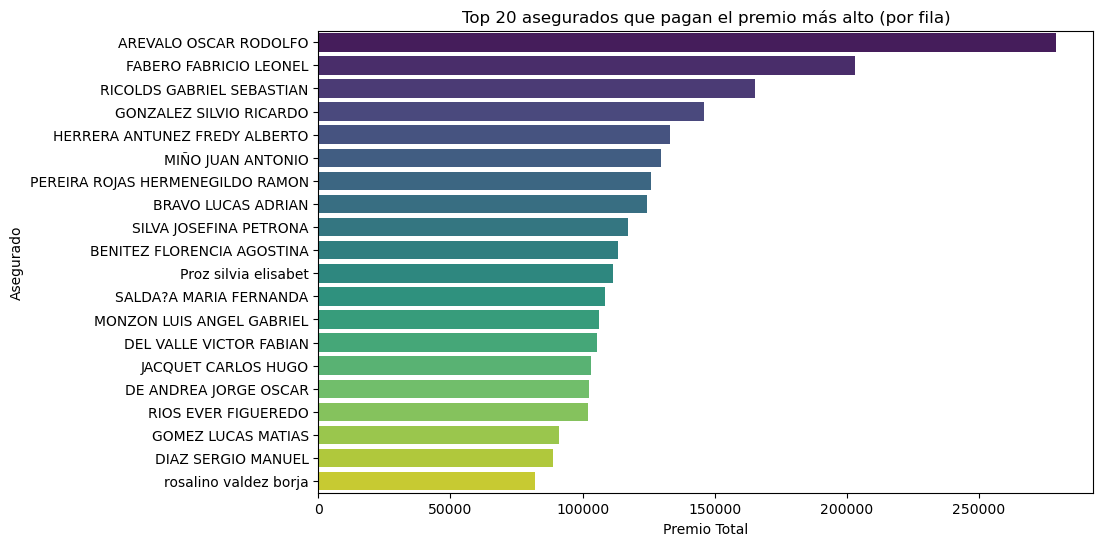

In [6]:
# 4. Top 20 asegurados que pagan el premio más alto (por fila)
top_20_asegurados_premio = df_filtered.sort_values(by='PremioTot', ascending=False).drop_duplicates('Aseg.').head(20)[['Aseg.', 'PremioTot']]
print("\nTop 20 asegurados que pagan el premio más alto (por fila):")
print(top_20_asegurados_premio)

# 4. Gráfico de barras horizontales para top 20 asegurados que pagan el premio más alto
plt.figure(figsize=(10, 6))
sns.barplot(x='PremioTot', y='Aseg.', data=top_20_asegurados_premio, palette='viridis')
plt.title('Top 20 asegurados que pagan el premio más alto (por fila)')
plt.xlabel('Premio Total')
plt.ylabel('Asegurado')
plt.show()



Top 20 asegurados que nos da más comisión (por fila):
                               Aseg.     ComMO
4804          JEREZ ALEJANDRO JAVIER  10248.03
1177          BARBIERI DAMIAN MATIAS   9820.24
3676          GARITA AMERICO ANTONIO   9035.63
2554           DATTOLI TOMAS IGNACIO   8882.72
9104  TAPARI ROJAS EMILIANO BASILIDE   8856.02
2998           EPREMIAN WALTER DARIO   8637.07
861            AREVALO OSCAR RODOLFO   8636.71
9652          VIERA SILVIO SEBASTIAN   8551.91
8304          SALDA?A MARIA FERNANDA   8366.85
5701             MARIA LAURA ROBLEDO   8316.26
6165               MIÑO JUAN ANTONIO   7998.37
7723             RIOS EVER FIGUEREDO   7842.80
1571             BOGARIN MARTINOSCAR   7789.53
5029         LAVINIA EMILIANO ANDRES   7780.17
5672             MARIA GISELA NATALE   7741.49
8440     SANCHEZ PEREZ MARIA SOLEDAD   7660.33
1440           BIDEGAIN LUIS ALBERTO   7646.33
6787                ORDUÑA VALENTINA   7596.25
5879            MARTINEZ PABLO CESAR   7560.30
3639 

C:\Users\Nico\AppData\Local\Temp\ipykernel_28120\507708571.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ComMO', y='Aseg.', data=top_20_asegurados_comision, palette='viridis')


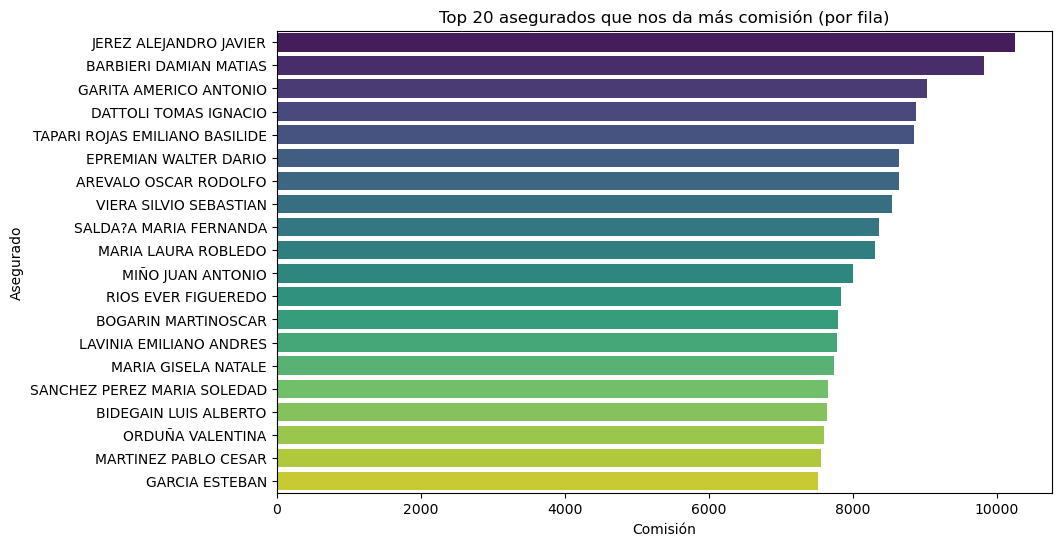

In [7]:
# 5. Top 20 asegurados que nos da más comisión (por fila)
top_20_asegurados_comision = df_filtered.sort_values(by='ComMO', ascending=False).drop_duplicates('Aseg.').head(20)[['Aseg.', 'ComMO']]
print("\nTop 20 asegurados que nos da más comisión (por fila):")
print(top_20_asegurados_comision)

# 5. Gráfico de barras horizontales para top 20 asegurados que nos da más comisión
plt.figure(figsize=(10, 6))
sns.barplot(x='ComMO', y='Aseg.', data=top_20_asegurados_comision, palette='viridis')
plt.title('Top 20 asegurados que nos da más comisión (por fila)')
plt.xlabel('Comisión')
plt.ylabel('Asegurado')
plt.show()